# How to Calculate Feature Importance With Python

Jason Brownlee. [Here](https://machinelearningmastery.com/calculate-feature-importance-with-python/)

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

After completing this tutorial, you will know:

- The role of feature importance in a `predictive modeling` problem.
- How to calculate and review feature importance from `linear models` and `decision trees`.
- How to calculate and review `permutation feature importance scores`.

## Tutorial Overview
This tutorial is divided into five parts; they are:

1. Feature Importance
2. Preparation
    1. Check Scikit-Learn Version (sklearn >= 0.22.1)
    2. Test Datasets
3. Coefficients as Feature Importance
    1. Linear Regression Feature Importance
    2. Logistic Regression Feature Importance
4. Decision Tree Feature Importance
    1. CART Feature Importance
    2. Random Forest Feature Importance
    3. XGBoost Feature Importance (xgboost >= 0.90)
5. Permutation Feature Importance
    1. Permutation Feature Importance for Regression
    2. Permutation Feature Importance for Classification

## 1. Feature Importance    
In this tutorial, we will look at three main types of more advanced feature importance; they are:

- Feature importance from `model coefficients`.
- Feature importance from `decision trees`.
- Feature importance from `permutation testing`.

## 2. Preparation
## 2.2 Test Datasets
Each test problem has five important and five unimportant features, and it may be interesting to see which methods are consistent at finding or differentiating the features based on their importance.
### 2.2.1 Classification Dataset
- We will use the make_classification() function to create a test binary classification dataset.
- The dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five will be redundant.

In [1]:
# test classification dataset 'sample'
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


### 2.2.2 Regression Dataset
- We will use the make_regression() function to create a test regression dataset.
- The regression dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five that will be redundant.

In [2]:
# test regression dataset
from sklearn.datasets import make_regression

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


## 3. Coefficients as Feature Importance
### 3.1 Linear Regression Feature Importance

In [3]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

# define datasets, each one have 1000 samples
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000


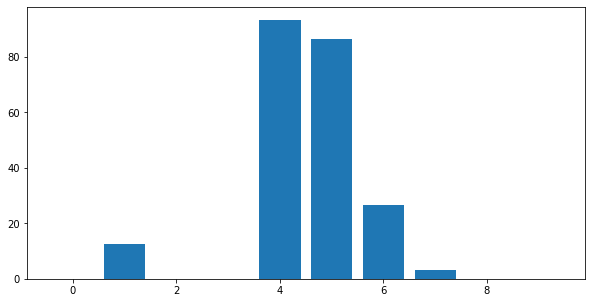

In [4]:
# plot feature importance
rcParams['figure.figsize'] = 10, 5
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The scores suggest that the model found the five important features and marked all other features with a zero coefficient, essentially removing them from the model.

### 3.2 Logistic Regression Feature Importance

In [5]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = LogisticRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.16237
Feature: 1, Score: -0.64314
Feature: 2, Score: 0.48377
Feature: 3, Score: -0.46158
Feature: 4, Score: 0.18440
Feature: 5, Score: -0.11963
Feature: 6, Score: -0.40467
Feature: 7, Score: 0.03680
Feature: 8, Score: -0.51735
Feature: 9, Score: 0.26411


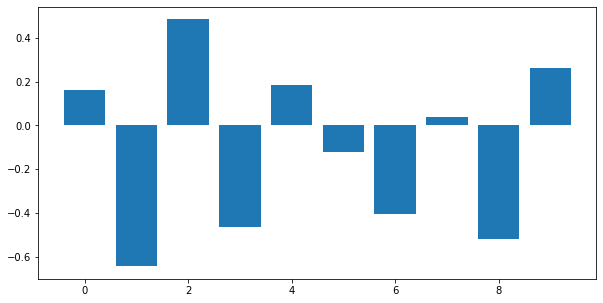

In [6]:
# plot feature importance
rcParams['figure.figsize'] = 10, 5
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

No clear pattern of important and unimportant features can be identified from these results, at least from what I can tell.

## 4. Decision Tree Feature Importance
### 4.1 CART Feature Importance
#### 4.1.1 CART Regression Feature Importance (DecisionTreeRegressor)

In [7]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00239
Feature: 1, Score: 0.00466
Feature: 2, Score: 0.00291
Feature: 3, Score: 0.00288
Feature: 4, Score: 0.51670
Feature: 5, Score: 0.43768
Feature: 6, Score: 0.02672
Feature: 7, Score: 0.00189
Feature: 8, Score: 0.00284
Feature: 9, Score: 0.00134


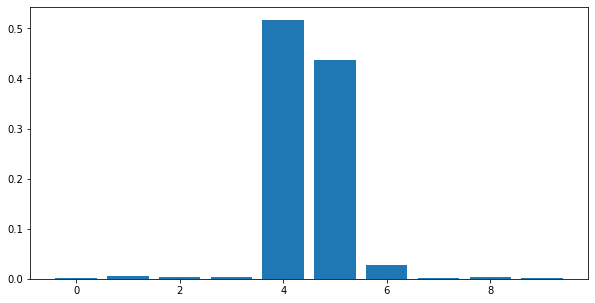

In [8]:
# plot feature importance
rcParams['figure.figsize'] = 10, 5
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps three of the 10 features as being important to prediction.

#### 4.1.2 CART Classification Feature Importance (DecisionTreeClassifier)

In [10]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = DecisionTreeClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02339
Feature: 1, Score: 0.01316
Feature: 2, Score: 0.18080
Feature: 3, Score: 0.31060
Feature: 4, Score: 0.08613
Feature: 5, Score: 0.01412
Feature: 6, Score: 0.15015
Feature: 7, Score: 0.03545
Feature: 8, Score: 0.13127
Feature: 9, Score: 0.05493


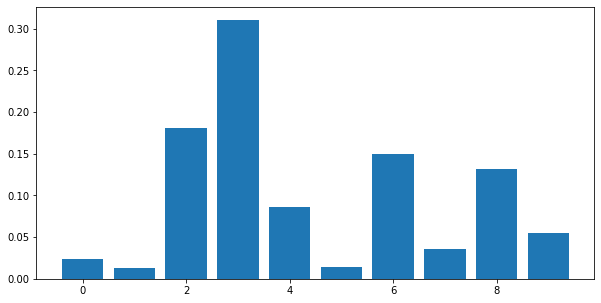

In [11]:
# plot feature importance
rcParams['figure.figsize'] = 10, 5
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps four of the 10 features as being important to prediction.

### 4.2 Random Forest Feature Importance
### 4.2.1 Random Forest Regression Feature Importance (RandomForestRegressor)

In [12]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00273
Feature: 1, Score: 0.00559
Feature: 2, Score: 0.00241
Feature: 3, Score: 0.00215
Feature: 4, Score: 0.51898
Feature: 5, Score: 0.43022
Feature: 6, Score: 0.02917
Feature: 7, Score: 0.00234
Feature: 8, Score: 0.00331
Feature: 9, Score: 0.00309


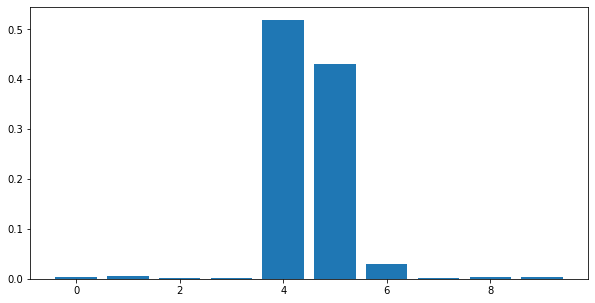

In [13]:
# plot feature importance
rcParams['figure.figsize'] = 10, 5
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

### 4.2.2 Random Forest Classification Feature Importance (RandomForestClassifier)

In [15]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = RandomForestClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08723
Feature: 1, Score: 0.12079
Feature: 2, Score: 0.16909
Feature: 3, Score: 0.16180
Feature: 4, Score: 0.07059
Feature: 5, Score: 0.11885
Feature: 6, Score: 0.08944
Feature: 7, Score: 0.04768
Feature: 8, Score: 0.08481
Feature: 9, Score: 0.04973


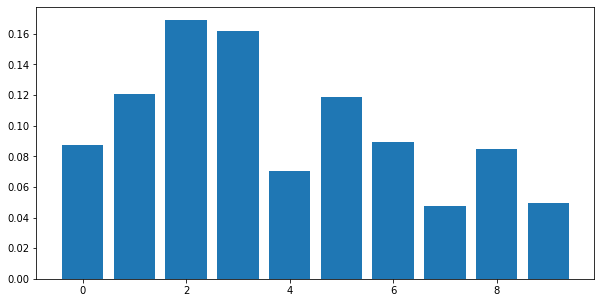

In [16]:
# plot feature importance
rcParams['figure.figsize'] = 10, 5
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

### 4.3 XGBoost Feature Importance
### 4.3.1 XGBoost Regression Feature Importance (XGBRegressor)

In [17]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = XGBRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

ModuleNotFoundError: No module named 'xgboost'

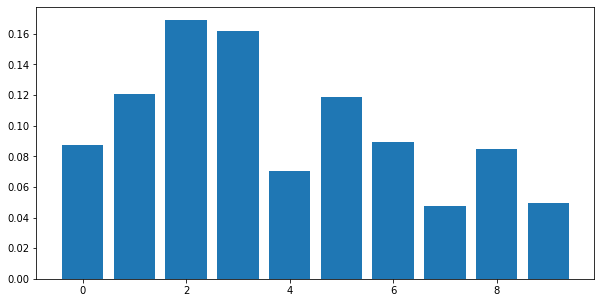

In [18]:
# plot feature importance
rcParams['figure.figsize'] = 10, 5
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

### 4.3.2 XGBoost Classification Feature Importance (XGBClassifier)

In [19]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = XGBClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

ModuleNotFoundError: No module named 'xgboost'

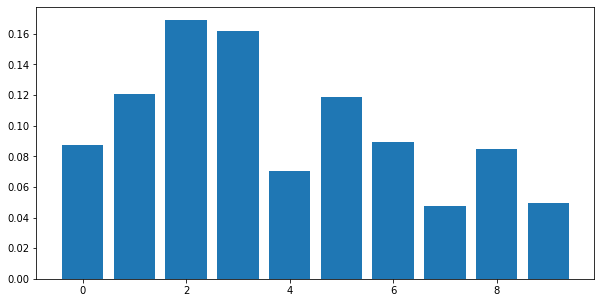

In [20]:
# plot feature importance
rcParams['figure.figsize'] = 10, 5
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps seven of the 10 features as being important to prediction.

## 5. Permutation Feature Importance

Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used.

First, a model is fit on the dataset, such as a model that does not support native feature importance scores. Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. This is repeated for each feature in the dataset. Then this whole process is repeated 3, 5, 10 or more times. The result is a mean importance score for each input feature (and distribution of scores given the repeats).

This approach can be used for regression or classification and requires that a performance metric be chosen as the basis of the importance score, such as the mean squared error for regression and accuracy for classification.

### 5.1 Permutation Feature Importance for Regression (KNeighborsRegressor)

In [21]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = KNeighborsRegressor()

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

ImportError: cannot import name 'permutation_importance' from 'sklearn.inspection' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\inspection\__init__.py)

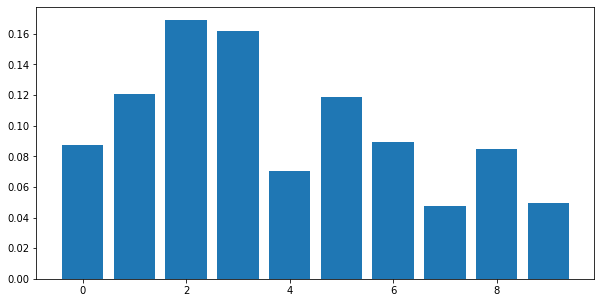

In [22]:
# plot feature importance
rcParams['figure.figsize'] = 10, 5
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

### 5.2 Permutation Feature Importance for Classification (KNeighborsClassifier)

In [23]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = KNeighborsClassifier()

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

ImportError: cannot import name 'permutation_importance' from 'sklearn.inspection' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\inspection\__init__.py)

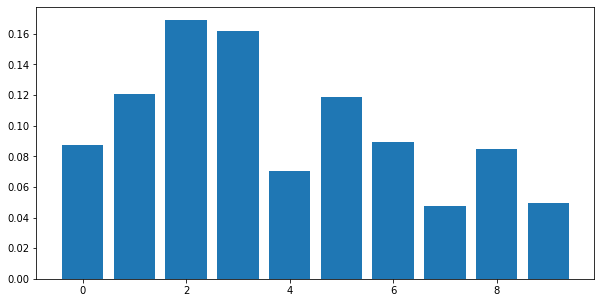

In [24]:
# plot feature importance
rcParams['figure.figsize'] = 10, 5
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.